# Walmart Sales Exploratory Data Analysis

## 1) Importing the necessary modules

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

## 2) Loading the dataset

In [2]:
df = pd.read_csv('Walmart.csv')
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


## 3) Exploring the dataframe

### a) Determine the shape of the dataframe

In [3]:
rows = df.shape[0]
columns =df.shape[1]

print("This dataset has",rows,"rows and",columns,"columns.")

This dataset has 6435 rows and 8 columns.


### b) Check the summary of the dataframe

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


#### Observations:

1. The data type of the values in the Date column is an string. We will convert them into a datetime data type.
2. The data type of the values in the Store column is an integer. We will convert them into a string data type.
3. The data type for the values in the Holiday_Flag column are integers. We will convert it into a categorical data type since the values are used for identification purposes.

## 4) Cleaning the data

### a) Handling missing values

In [5]:
# Getting the number of missing data points per column
missing_values = df.isnull().sum()

# Look at the number of missing data points in the first tn columns
missing_values[0:10]

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

**There are no missing data points in this data set.**

### b) Converting incorrect data types

In [6]:
# Converting the data values of the "Date" column from string to datetime64.
df.Date =  pd.to_datetime(df.Date, format="%d-%m-%Y")

# Converting the data values of the "Store" column from integer to string.
df.Store = df.Store.apply(str)

#Converting the data value of the "Holiday_Flag" columns from integer to category
df.Holiday_Flag = pd.Categorical(df.Holiday_Flag)

# Rechecking the data type if they were changed
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   object        
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   category      
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: category(1), datetime64[ns](1), float64(5), object(1)
memory usage: 358.4+ KB


**The data types of the values in the "Date", "Store", and "Holiday_Flag" columns were changed.**

### c) Add two columns for the week number and year

In [7]:
# Adding a column for week number
df['Week_number'] = df['Date'].dt.isocalendar().week

# Adding a column for the year
df['Year'] = df['Date'].dt.year

# Checking the dataset if changes were applied
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   object        
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   category      
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
 8   Week_number   6435 non-null   UInt32        
 9   Year          6435 non-null   int64         
dtypes: UInt32(1), category(1), datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 440.1+ KB


## 4) Data Analysis

### a) Who are the top 5 Walmart store branches in terms of total sales?

In [8]:
# Grouping the dataset by store number then aggregating the total sales per store branch
sales_per_branch = df.groupby('Store')['Weekly_Sales'].sum()

# Converting the series into dataframe and sort the weekly sales per branch
sales_per_branch = sales_per_branch.to_frame().sort_values(by='Weekly_Sales', ascending=False)

sales_per_branch = sales_per_branch.reset_index()

# Created a new column that will show the value of weekly sales in million USD
sales_per_branch['Total_Sales (in mln. USD)'] = sales_per_branch['Weekly_Sales']/1e06

# Droping the "Weekly_Sales" column and get the top 5 branches in terms of total sales
top_5_branches = sales_per_branch.drop(columns=['Weekly_Sales']).head()
top_5_branches

,Store,Total_Sales (in mln. USD)
0,20,301.397792
1,4,299.543953
2,14,288.999911
3,13,286.517704
4,2,275.382441


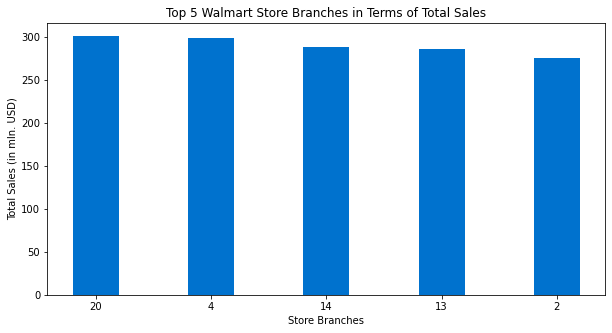

In [9]:
store = top_5_branches['Store']
total_sales = top_5_branches['Total_Sales (in mln. USD)']

fig = plt.figure(figsize = (10,5)) 
plt.bar(store, total_sales, color = '#0072ce', width = 0.4)
plt.xlabel("Store Branches")
plt.ylabel("Total Sales (in mln. USD)")
plt.title("Top 5 Walmart Store Branches in Terms of Total Sales")
plt.show()

**Store Branch Nos. 20, 4, 14, 13, and 2 are the top 5 Walmart store branches in terms of total sales.**

### b) What is the trend of the weekly sales of Walmart Store Branch No. 20

In [10]:
# Creating a new dataframe showing data from Walmart Store Branch No. 20 in 2010
store_20 = df[df.Store.str.contains("20")]

# Add column for the 4-week simple moving average of the weekly sales
store_20['Weekly_Sales_Mean'] = store_20['Weekly_Sales'].rolling(4).mean()

store_20.tail()

<ipython-input-10-13090b13bbf3>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  store_20['Weekly_Sales_Mean'] = store_20['Weekly_Sales'].rolling(4).mean()


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Week_number,Year,Weekly_Sales_Mean
2855,20,2012-09-28,2008350.58,0,58.65,3.997,215.736716,7.280,39,2012,2.041354e+06
2856,20,2012-10-05,2246411.89,0,60.77,3.985,215.925886,7.293,40,2012,2.082825e+06
2857,20,2012-10-12,2162951.36,0,47.20,4.000,216.115057,7.293,41,2012,2.111575e+06
2858,20,2012-10-19,1999363.49,0,56.26,3.969,216.146470,7.293,42,2012,2.104269e+06
2859,20,2012-10-26,2031650.55,0,60.04,3.882,216.151590,7.293,43,2012,2.110094e+06


Text(0.5, 1.0, 'Walmart Store Branch #20 Weekly Sales')

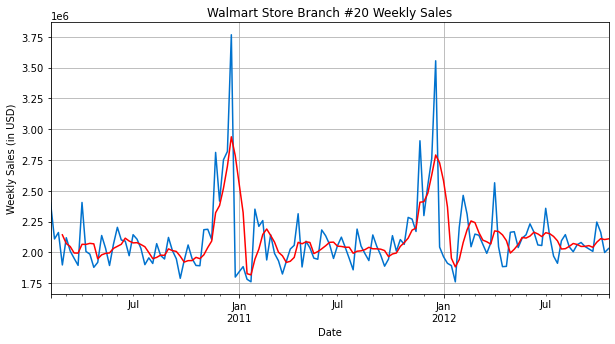

In [11]:
# Creating a line graph

store_20.set_index('Date')['Weekly_Sales'].plot(figsize=(10,5), color="#0072ce")
store_20.set_index('Date')['Weekly_Sales'].rolling(4).mean().plot(color='r')
plt.grid()
plt.ylabel("Weekly Sales (in USD)")
plt.title("Walmart Store Branch #20 Weekly Sales")

**There has been slight decreasing trend in the weekly sales of Walmart Store Branch No. 20 during the whole period. Also noticeable is the sudden increasing trend of the weekly sales starting mid-September to mid-December of 2010 and 2011. However, the peak weekly sales from mid-December of 2011 is much more lower than the peek weekly sales of the same period in 2010.**

### c) What is the correlation of each of the 4 key features(temperature, fuel price, CPI, and unemployment) and the weekly sales in Store Branch No. 20?

In [14]:
#Displaying the first 5 rows of the dataframe
store_20.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Week_number,Year,Weekly_Sales_Mean
2717,20,2010-02-05,2401395.47,0,25.92,2.784,204.247194,8.187,5,2010,NaN
2718,20,2010-02-12,2109107.90,1,22.12,2.773,204.385747,8.187,6,2010,NaN
2719,20,2010-02-19,2161549.76,0,25.43,2.745,204.432100,8.187,7,2010,NaN
2720,20,2010-02-26,1898193.95,0,32.32,2.754,204.463087,8.187,8,2010,2.142562e+06
2721,20,2010-03-05,2119213.72,0,31.75,2.777,204.494073,8.187,9,2010,2.072016e+06


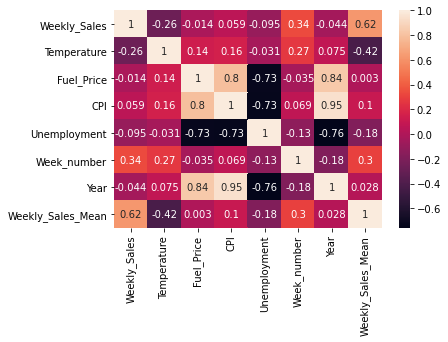

In [22]:
# Creating a correlation matrix
corr_matrix = store_20.corr(method = "pearson")

sns.heatmap(corr_matrix, annot=True)

plt.show()

1. The CPI(consumer price index) has a weak positive correlation with the weekly sales. 
2. The unemployment rate, fuel price, and temperature, has a weak negative correlation with the weekly sales.  